## Imports

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [85]:
PATH = '../data/2019-20/players_raw.csv'

In [86]:
players_df = pd.read_csv(PATH)

## Threshold on minutes played

In [87]:
players_df = players_df[players_df['minutes'] > 90*15] #should have played atleast 15 full matches

In [88]:
players_df

,assists,bonus,bps,chance_of_playing_next_round,chance_of_playing_this_round,clean_sheets,code,cost_change_event,cost_change_event_fall,cost_change_start,...,threat_rank_type,total_points,transfers_in,transfers_in_event,transfers_out,transfers_out_event,value_form,value_season,web_name,yellow_cards
2,2,1,331,100,100,4,111457,0,0,-3,...,98,55,65194,0,134275,0,0.5,10.6,Kolasinac,4
3,2,3,244,100,100,3,154043,0,0,-5,...,119,41,610816,0,653555,0,0.1,9.1,Maitland-Niles,4
4,0,5,305,100,100,4,39476,0,0,-2,...,76,57,182201,0,231413,0,0.0,11.9,Sokratis,6
10,5,37,807,100,100,10,54694,0,0,-1,...,7,205,3870546,0,4120318,0,0.6,18.8,Aubameyang,3
11,7,16,387,100,100,5,59966,0,0,-3,...,19,118,458912,0,551879,0,0.5,12.8,Lacazette,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,8,680,None,None,13,38533,0,0,3,...,69,153,1224396,0,957926,0,0.7,28.9,Patrício,0
647,2,7,498,100,100,13,171317,0,0,-3,...,72,97,410866,0,676439,0,0.6,18.7,Neves,9
648,7,12,617,None,None,11,19624,0,0,-2,...,133,113,684882,0,836481,0,0.4,21.3,Moutinho,7
650,9,14,522,100,100,7,159533,0,0,6,...,32,130,3191443,0,2346310,0,0.3,23.2,Traoré,1


In [89]:
players_df.sort_values(by=['minutes'], inplace=True, ascending = False)
players_df.columns

Index(['assists', 'bonus', 'bps', 'chance_of_playing_next_round',
       'chance_of_playing_this_round', 'clean_sheets', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'creativity', 'creativity_rank',
       'creativity_rank_type', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'goals_conceded',
       'goals_scored', 'ict_index', 'ict_index_rank', 'ict_index_rank_type',
       'id', 'in_dreamteam', 'influence', 'influence_rank',
       'influence_rank_type', 'minutes', 'news', 'news_added', 'now_cost',
       'own_goals', 'penalties_missed', 'penalties_saved', 'photo',
       'points_per_game', 'red_cards', 'saves', 'second_name',
       'selected_by_percent', 'special', 'squad_number', 'status', 'team',
       'team_code', 'threat', 'threat_rank', 'threat_rank_type',
       'total_points', 'transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_

## Making a custom dataframe

In [90]:
screened_players_df = players_df[['first_name', 'second_name', 'web_name', 'element_type', 'assists', 'bonus', 'bps', 'clean_sheets', 'creativity', 'creativity_rank',
       'creativity_rank_type', 'goals_conceded', 'goals_scored', 'ict_index', 'ict_index_rank', 'ict_index_rank_type', 'id', 'influence', 'influence_rank',
       'influence_rank_type', 'minutes', 'own_goals', 'penalties_missed', 'penalties_saved','total_points', 'points_per_game', 'threat', 'threat_rank', 'threat_rank_type','transfers_in', 'transfers_in_event', 'transfers_out',
       'transfers_out_event', 'value_form', 'value_season', 'yellow_cards', 'red_cards', 'now_cost', 'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall']]
screened_players_df.to_csv('./screened_players.csv', index = False)

In [91]:
screened_players_df.sort_values(by=['minutes'], ascending = False)
screened_players_df[['web_name', 'minutes', 'now_cost', 'total_points', 'points_per_game']]

,web_name,minutes,now_cost,total_points,points_per_game
644,Patrício,3420,53,153,4.0
136,Tarkowski,3420,55,143,3.8
464,Baldock,3420,50,142,3.7
507,Ward-Prowse,3420,57,117,3.1
637,Coady,3420,51,118,3.1
...,...,...,...,...,...
501,Long,1386,46,62,2.4
3,Maitland-Niles,1382,45,41,2.0
439,Hernández,1374,53,52,2.0
407,Longstaff,1370,50,44,1.9


In [92]:
screened_players_df['matches_played'] = round(screened_players_df['total_points'] / screened_players_df['points_per_game'])

<ipython-input-92-95780c440502>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  screened_players_df['matches_played'] = round(screened_players_df['total_points'] / screened_players_df['points_per_game'])


In [93]:
screened_players_df[['web_name', 'minutes', 'now_cost', 'total_points', 'points_per_game', 'matches_played']]

,web_name,minutes,now_cost,total_points,points_per_game,matches_played
644,Patrício,3420,53,153,4.0,38.0
136,Tarkowski,3420,55,143,3.8,38.0
464,Baldock,3420,50,142,3.7,38.0
507,Ward-Prowse,3420,57,117,3.1,38.0
637,Coady,3420,51,118,3.1,38.0
...,...,...,...,...,...,...
501,Long,1386,46,62,2.4,26.0
3,Maitland-Niles,1382,45,41,2.0,20.0
439,Hernández,1374,53,52,2.0,26.0
407,Longstaff,1370,50,44,1.9,23.0


## Sort by total points

In [94]:
screened_players_df[['web_name', 'minutes', 'now_cost', 'total_points', 'points_per_game', 'matches_played']].sort_values(by=['total_points'], ascending = False).head(15)

,web_name,minutes,now_cost,total_points,points_per_game,matches_played
338,De Bruyne,2790,106,251,7.2,35.0
305,Salah,2879,125,233,6.9,34.0
306,Mané,2745,121,221,6.3,35.0
270,Vardy,3032,97,210,6.0,35.0
296,Alexander-Arnold,3173,77,210,5.5,38.0
10,Aubameyang,3136,109,205,5.7,36.0
337,Sterling,2651,120,204,6.2,33.0
372,Martial,2625,85,200,6.2,32.0
499,Ings,2800,76,198,5.2,38.0
642,Jiménez,3241,80,194,5.1,38.0


## Sort by points per game

In [95]:
screened_players_df[['web_name', 'minutes', 'now_cost', 'total_points', 'points_per_game', 'matches_played']].sort_values(by=['points_per_game'], ascending = False).head(15)

,web_name,minutes,now_cost,total_points,points_per_game,matches_played
338,De Bruyne,2790,106,251,7.2,35.0
305,Salah,2879,125,233,6.9,34.0
306,Mané,2745,121,221,6.3,35.0
372,Martial,2625,85,200,6.2,32.0
337,Sterling,2651,120,204,6.2,33.0
270,Vardy,3032,97,210,6.0,35.0
10,Aubameyang,3136,109,205,5.7,36.0
366,Rashford,2645,89,177,5.7,31.0
168,Alonso,1429,61,100,5.6,18.0
540,Son,2478,97,169,5.6,30.0


In [96]:
ppg_df = screened_players_df[['web_name', 'points_per_game', 'total_points', 'now_cost']]

In [97]:
ppg_df

,web_name,points_per_game,total_points,now_cost
644,Patrício,4.0,153,53
136,Tarkowski,3.8,143,55
464,Baldock,3.7,142,50
507,Ward-Prowse,3.1,117,57
637,Coady,3.1,118,51
...,...,...,...,...
501,Long,2.4,62,46
3,Maitland-Niles,2.0,41,45
439,Hernández,2.0,52,53
407,Longstaff,1.9,44,50


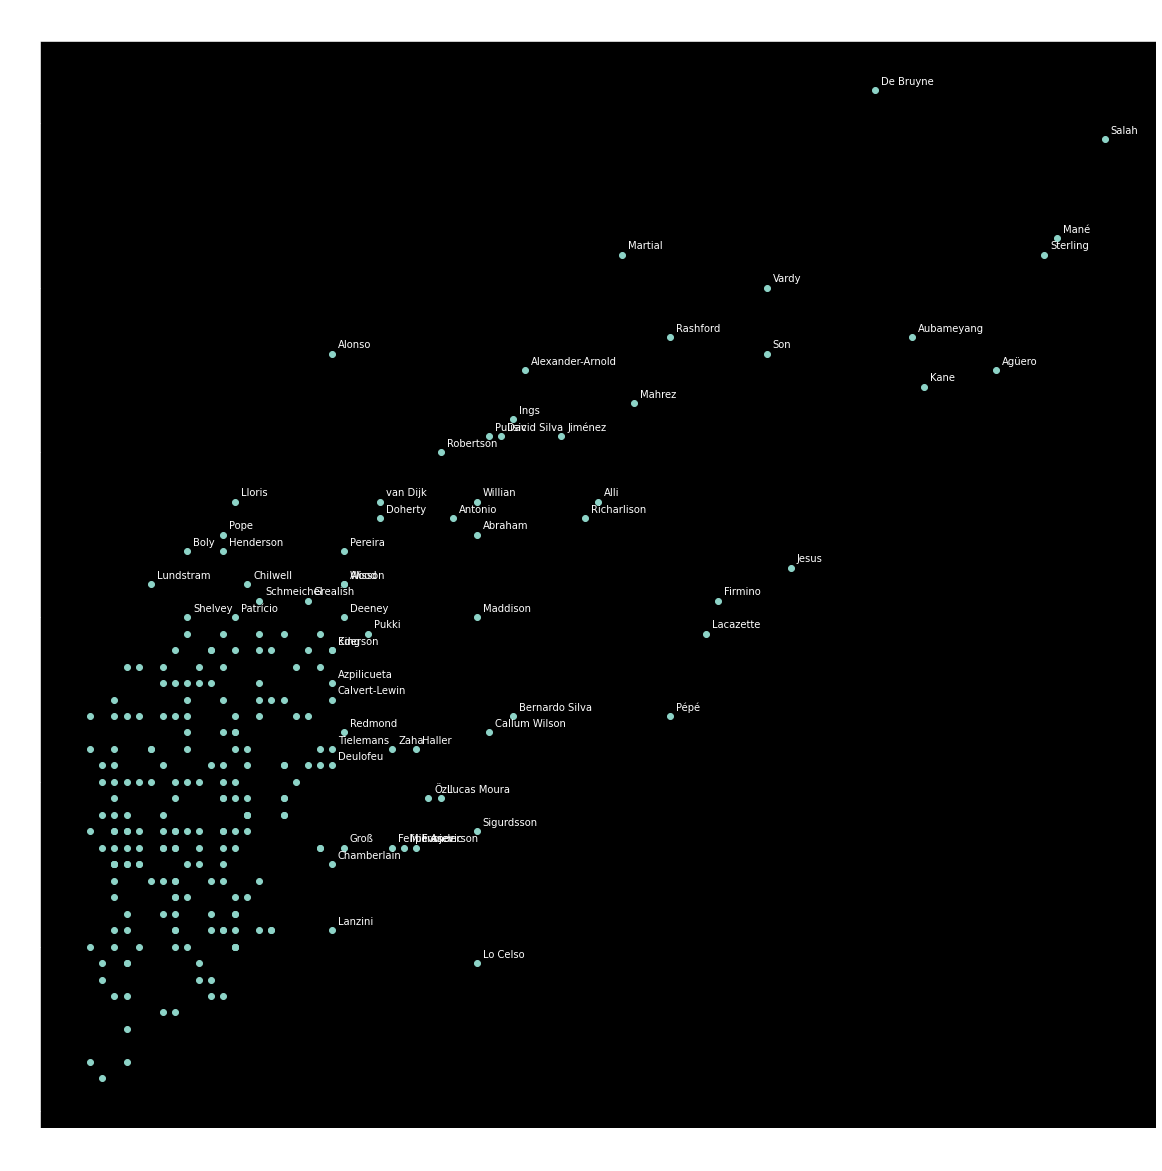

In [98]:
fg_color = 'white'
plt.figure(figsize=(20,20))
plt.style.use("dark_background")
plt.title('FPL 19-20, Min 12 matches', color=fg_color, size = 36)
plt.xlabel('Cost', color=fg_color, size = 16)
plt.ylabel('Points per game', color=fg_color, size = 16)
plt.scatter(ppg_df['now_cost'] , ppg_df['points_per_game'],  marker='o')
for x,y,lbl in zip(ppg_df['now_cost'] , ppg_df['points_per_game'], ppg_df['web_name']):
    label = lbl

    # this method is called for each point
    if x > 60 or y > 3.9:
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(6,6), # distance from text to points (x,y)
                     ha='left') # horizontal alignment can be left, right or center
plt.savefig('./figs/FPL_full_no_annotation.png')
plt.show()

## Premium Players

In [99]:
premium_df = ppg_df[ppg_df['now_cost'] > 90]
premium_df.sort_values(by=['points_per_game'], ascending = False)

,web_name,points_per_game,total_points,now_cost
338,De Bruyne,7.2,251,106
305,Salah,6.9,233,125
306,Mané,6.3,221,121
337,Sterling,6.2,204,120
270,Vardy,6.0,210,97
10,Aubameyang,5.7,205,109
540,Son,5.6,169,97
333,Agüero,5.5,132,116
536,Kane,5.4,158,110
334,Jesus,4.3,146,99


## Top Players

In [100]:
top_df = ppg_df[(ppg_df['now_cost'] < 90) & (ppg_df['now_cost'] >70)]
top_df.sort_values(by=['points_per_game'], ascending = False)

,web_name,points_per_game,total_points,now_cost
372,Martial,6.2,200,85
366,Rashford,5.7,177,89
296,Alexander-Arnold,5.5,210,77
340,Mahrez,5.3,175,86
499,Ings,5.2,198,76
642,Jiménez,5.1,194,80
342,David Silva,5.1,139,75
185,Pulisic,5.1,127,74
542,Alli,4.7,117,83
177,Willian,4.7,168,73


In [101]:
top_df.shape

(19, 4)

## Mid range players

In [102]:
midrange_df = ppg_df[(ppg_df['now_cost'] < 70) & (ppg_df['now_cost'] >55)]
print(midrange_df.shape)
midrange_df.sort_values(by=['points_per_game'], ascending = False).head(10)

(49, 4)


,web_name,points_per_game,total_points,now_cost
168,Alonso,5.6,100,61
297,van Dijk,4.7,178,65
635,Doherty,4.6,167,65
264,Pereira,4.4,123,62
303,Alisson,4.2,122,62
143,Wood,4.2,136,62
44,Grealish,4.1,149,59
573,Deeney,4.0,109,62
327,Walker,3.9,114,57
285,Pérez,3.9,129,60


In [103]:
midrange_df.sort_values(by=['points_per_game'], ascending = False).tail(10)

,web_name,points_per_game,total_points,now_cost
619,Fornals,2.6,93,60
438,Buendía,2.6,94,60
114,Groß,2.6,76,62
210,Milivojevic,2.6,81,67
86,Fraser,2.6,73,68
610,Felipe Anderson,2.6,66,66
307,Chamberlain,2.5,76,61
580,Pereyra,2.1,60,56
231,Iwobi,2.1,52,56
611,Lanzini,2.1,50,61


## Bargain Players

In [104]:
bargain_df = ppg_df[ppg_df['now_cost'] <55]
print(bargain_df.shape)
bargain_df.sort_values(by=['points_per_game'], ascending = False).head(24)

(165, 4)


,web_name,points_per_game,total_points,now_cost
538,Lloris,4.7,98,53
145,Pope,4.5,170,52
480,Henderson,4.4,160,52
638,Boly,4.4,97,49
467,Lundstram,4.2,144,46
265,Chilwell,4.2,114,54
644,Patrício,4.0,153,53
406,Shelvey,4.0,105,49
207,Guaita,3.9,137,49
312,Henderson,3.9,116,52


In [105]:
bargain_df.sort_values(by=['points_per_game'], ascending = False).tail(10)

,web_name,points_per_game,total_points,now_cost
514,Oriol Romeu,1.7,51,43
377,Fred,1.7,50,51
545,Winks,1.7,52,52
431,Lewis,1.7,48,44
172,Christensen,1.6,34,48
17,Torreira,1.6,46,47
64,Nakamba,1.5,43,44
567,Mariappa,1.3,26,41
428,Godfrey,1.3,38,44
217,McCarthy,1.2,41,42


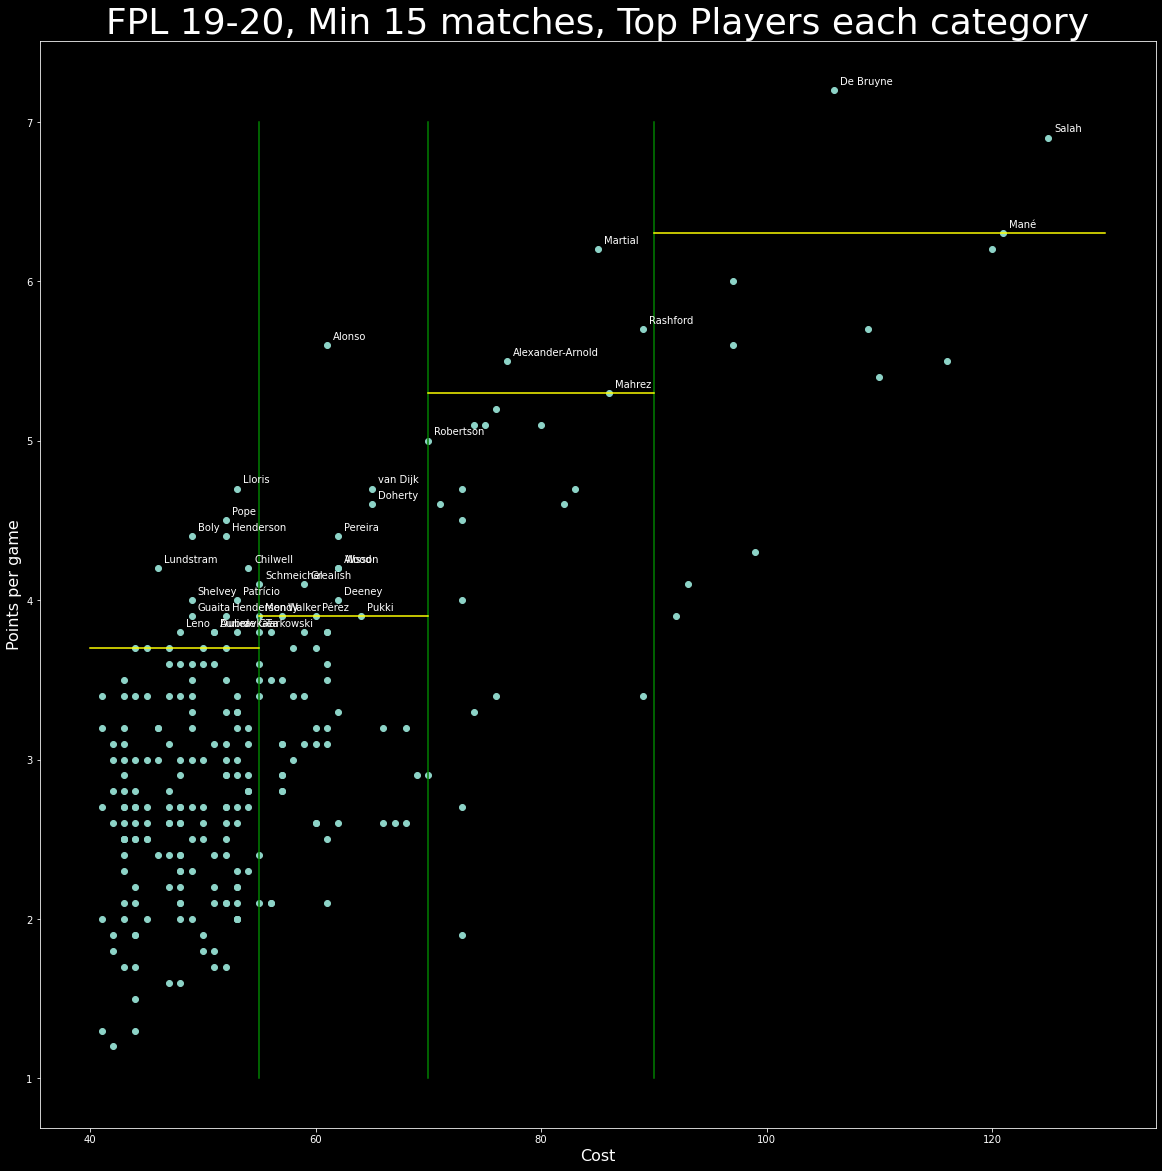

In [106]:
fg_color = 'white'
plt.figure(figsize=(20,20))
plt.style.use("dark_background")
plt.title('FPL 19-20, Min 15 matches, Top Players each category', color=fg_color, size = 36)
plt.xlabel('Cost', color=fg_color, size = 16)
plt.ylabel('Points per game', color=fg_color, size = 16)
plt.scatter(ppg_df['now_cost'] , ppg_df['points_per_game'],  marker='o')
for x,y,lbl in zip(ppg_df['now_cost'] , ppg_df['points_per_game'], ppg_df['web_name']):
    label = lbl

    # this method is called for each point
    if perc(x, y):
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(6,6), # distance from text to points (x,y)
                     ha='left') # horizontal alignment can be left, right or center
    
data=[(55, 55), (1, 7), 'g', (70, 70), (1, 7), 'g', (90, 90), (1, 7), 'g', (90, 130), (6.3, 6.3), 'yellow', (70, 90), (5.3, 5.3), 'yellow'
     , (55, 70), (3.9, 3.9), 'yellow', (40, 55), (3.7, 3.7), 'yellow']
plt.plot(*data)
    
plt.savefig('./figs/FPL_full_plot_top_1.png')
plt.show()

In [107]:
def perc(x, y):
    if x > 90:
        if y >= 6.3:
            return True
    elif x > 70:
        if y >= 5.3:
            return True
    elif x > 55:
        if y >= 3.9:
            return True
    else:
        if y > 3.7:
            return True
    return False

In [108]:
def color_array(cost_array):
    color_arr = []
    for i in range(len(cost_array)):
        if cost_array[i] > 90:
            color_arr.append('gold')
        elif cost_array[i] > 70:
            color_arr.append('red')
        elif cost_array[i] > 55:
            color_arr.append('xkcd:salmon')
        else:
            color_arr.append('dodgerblue')
            
    return np.array(color_arr)

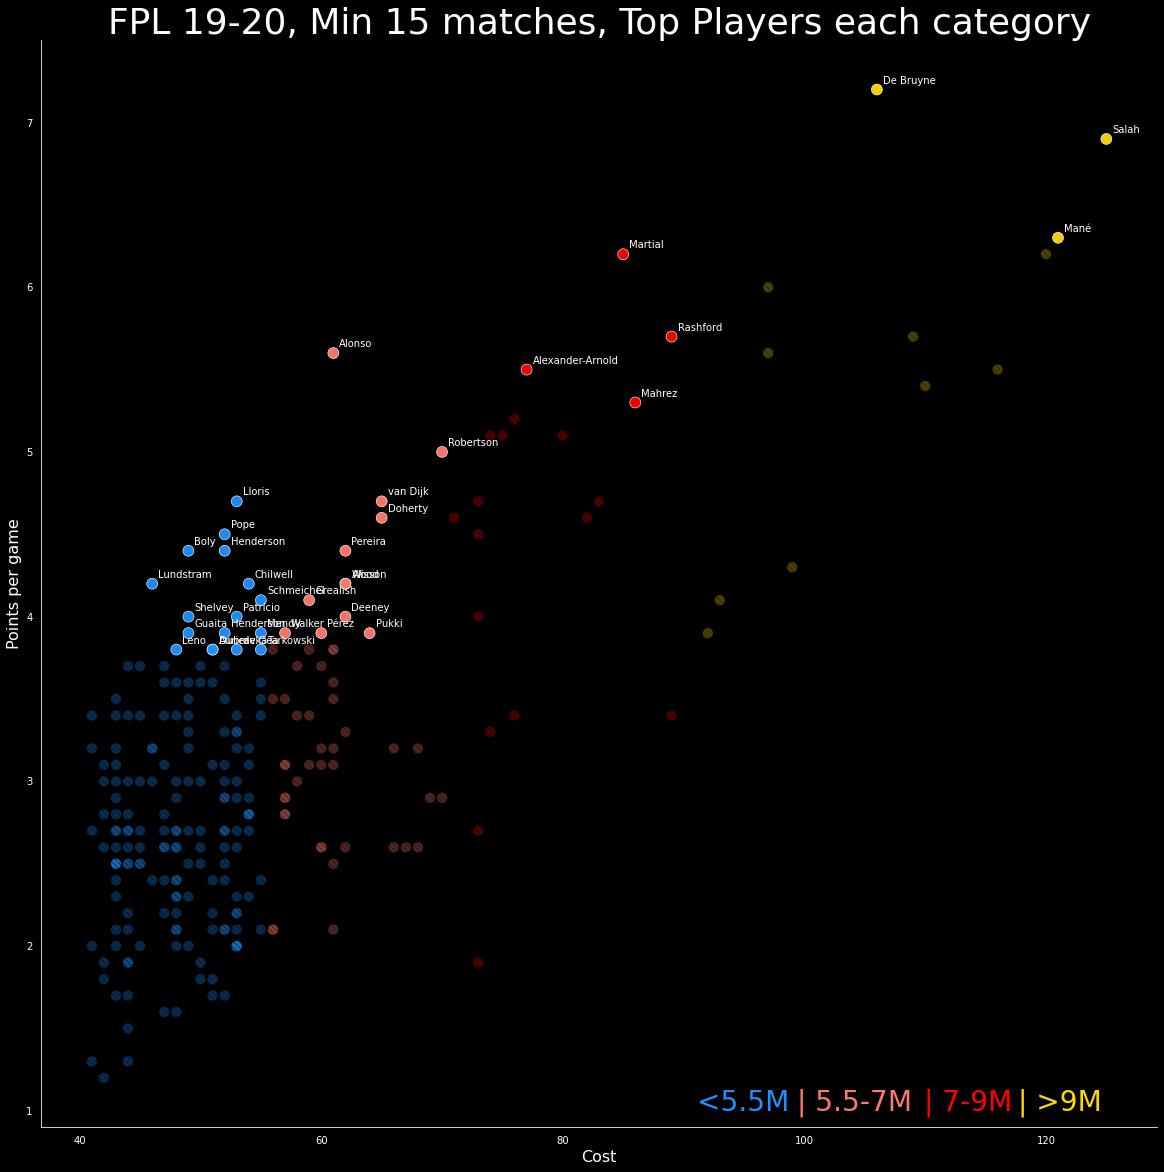

In [109]:
plt.style.use("dark_background") ##I used a custom stylesheet in the original viz for the background color and fonts (which is Source Sans Pro)
fig, ax = plt.subplots(figsize=(20,20))
plt.title('FPL 19-20, Min 15 matches, Top Players each category', color=fg_color, size = 36)
n=len(ppg_df['now_cost']) ##number of points
xs, ys = ppg_df['now_cost'].values , ppg_df['points_per_game'].values
colors = color_array(xs)
ax.scatter(xs, ys, s=110, c=colors, alpha=.3, ec="k", linewidth=.4, hatch=r"\\\\")

selected = []
k = 0
for x,y,lbl in zip(ppg_df['now_cost'] , ppg_df['points_per_game'], ppg_df['web_name']):
    label = lbl
    # this method is called for each point
    if perc(x, y):
        selected.append(k)
        plt.annotate(label, # this is the text
                     (x,y), # this is the point to label
                     textcoords="offset points", # how to position the text
                     xytext=(6,6), # distance from text to points (x,y)
                     ha='left') # horizontal alignment can be left, right or center
    k+=1

##highlight certain selected points
sel_ind = np.array(selected) ##select certain indices
sel_x = xs[sel_ind]
sel_y = ys[sel_ind]
sel_cols = colors[sel_ind]
ax.scatter(sel_x, sel_y, s=120,c=sel_cols , alpha=.95, ec="white", linewidth=.6,) ##changed the alpha and removed the hatch for a more focused appearance


##axes cosmetics
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.tick_params(axis="both", which = "both", size=5, bottom=False, top=False, labelbottom=True, right=False, labelright=False, left=False, labelleft=True, labeltop=False)
ax.set_xlabel('Cost', color=fg_color, size = 16)
ax.set_ylabel('Points per game', color=fg_color, size = 16)
ax.text(0.95, 0.01, '| >9M',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='gold', fontsize=28)
ax.text(0.87, 0.01, '| 7-9M',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='red', fontsize=28)
ax.text(0.78, 0.01, '| 5.5-7M',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='xkcd:salmon', fontsize=28)
ax.text(0.67, 0.01, '<5.5M',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='dodgerblue', fontsize=28)
plt.savefig('./figs/FPL_full_plot_top_color_1.png')
plt.show()